# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [4]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [173]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

import scipy
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
print(
    scipy.__version__
)  # Пришлось установить старую версию из-за несовместимости с skplt

1.11.4


In [5]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, "\n")
print(dataset.metadata.abstract, "\n")
print(dataset.metadata.additional_info.summary, "\n")

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [37]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846, 1)
(549, 18) (549, 1) (297, 18) (297, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [38]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
84,89.0,40,76,188,76,7,150,44,19,136,174,342,148,72,3,8,193,197
620,108.0,56,103,234,73,10,221,30,25,174,232,718,214,73,8,3,187,197
227,94.0,35,66,147,62,9,131,50,18,127,159,258,115,66,8,7,196,201
448,101.0,53,91,194,65,6,204,32,23,161,231,636,214,78,5,14,192,192
761,115.0,51,100,201,60,12,196,34,23,162,207,573,184,62,22,1,198,208
825,86.0,39,84,149,57,8,156,43,20,133,185,358,157,74,0,23,183,190
265,80.0,45,71,128,56,7,151,45,19,147,171,337,176,79,3,16,181,187
691,86.0,45,71,170,70,6,146,45,19,146,172,321,189,71,10,8,187,191
588,89.0,38,78,153,61,7,146,46,19,127,166,314,142,69,0,9,187,194
741,87.0,39,74,165,66,6,145,45,19,134,173,318,139,70,3,21,195,200


Methods `describe` and `info` deliver some useful information.

In [39]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.675774,44.859745,82.575592,169.539162,61.777778,8.781421,169.367942,40.836066,20.639344,147.985428,189.437158,442.673953,175.027322,72.380692,6.429872,12.987250,188.989071,195.759563
std,8.266356,6.105251,15.962440,33.702932,8.310455,5.160167,33.437317,7.861164,2.619617,14.344553,31.573315,177.803501,33.114229,7.419573,5.007759,9.192677,6.045137,7.427541
min,73.000000,33.000000,42.000000,104.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,88.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,138.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,218.000000,600.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,58.000000,112.000000,322.000000,133.000000,55.000000,265.000000,59.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [40]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 84 to 495
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       549 non-null    float64
 1   CIRCULARITY                       549 non-null    int64  
 2   DISTANCE CIRCULARITY              549 non-null    int64  
 3   RADIUS RATIO                      549 non-null    int64  
 4   PR.AXIS ASPECT RATIO              549 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           549 non-null    int64  
 6   SCATTER RATIO                     549 non-null    int64  
 7   ELONGATEDNESS                     549 non-null    int64  
 8   PR.AXIS RECTANGULARITY            549 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         549 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  549 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  549 non-null    int64  
 12  SCALED RADIU

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Заметим, что в даных есть один пропуск. Заполним его средним значением признака. Помимо этого, в таргет затесался некий класс "204". Исправим эти недочеты.

In [41]:
### YOUR CODE HERE
data.isna().sum()

COMPACTNESS                         1
CIRCULARITY                         0
DISTANCE CIRCULARITY                0
RADIUS RATIO                        0
PR.AXIS ASPECT RATIO                0
MAX.LENGTH ASPECT RATIO             0
SCATTER RATIO                       0
ELONGATEDNESS                       0
PR.AXIS RECTANGULARITY              0
MAX.LENGTH RECTANGULARITY           0
SCALED VARIANCE ALONG MAJOR AXIS    0
SCALED VARIANCE ALONG MINOR AXIS    0
SCALED RADIUS OF GYRATION           0
SKEWNESS ABOUT MAJOR AXIS           0
SKEWNESS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MAJOR AXIS           0
HOLLOWS RATIO                       0
dtype: int64

In [42]:
target.value_counts()

class
bus      217
saab     217
opel     212
van      199
204        1
Name: count, dtype: int64

In [55]:
df = pd.concat([data, target], axis=1)
df = df[df["class"].isin(["bus", "saab", "van", "opel"])].reset_index(drop=True)
df

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,class
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91.0,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104.0,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93.0,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85.0,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,93.0,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
841,89.0,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
842,106.0,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
843,86.0,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [59]:
target = df["class"]
data = df.drop("class", axis=1)
data

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91.0,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104.0,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93.0,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85.0,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,93.0,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
841,89.0,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
842,106.0,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
843,86.0,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


In [61]:
data = data.fillna(data.mean())

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
X_train_pd = pd.DataFrame(X_train)
X_train_pd

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
575,109.0,54,103,220,66,11,214,31,24,167,229,677,212,70,1,23,188,201
236,96.0,37,74,199,74,5,165,39,20,128,188,419,136,72,1,3,196,200
441,90.0,47,73,136,58,11,161,42,20,153,172,376,185,77,11,8,183,191
729,103.0,48,96,232,71,10,205,32,23,153,226,633,197,71,2,15,188,196
389,100.0,57,107,207,63,11,227,30,25,180,234,756,205,72,6,19,186,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,82.0,36,51,114,53,4,135,50,18,126,150,268,144,86,15,4,181,182
794,83.0,40,53,114,53,6,132,53,18,140,142,247,157,86,8,7,176,183
215,90.0,39,86,169,62,7,162,41,20,131,194,388,147,74,1,22,185,191
468,105.0,51,108,201,62,11,220,30,25,163,232,711,202,72,12,16,189,200


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [95]:
### YOUR CODE HERE
log_reg = LogisticRegression(
    multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500
)

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2"],
}
grid_search = GridSearchCV(
    estimator=log_reg, param_grid=param_grid, cv=3, scoring="f1_macro"
)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [96]:
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'C': 100, 'penalty': 'l1'}


In [97]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

In [98]:
best_log_reg = grid_search.best_estimator_

y_pred = best_log_reg.predict(X_test_scaled)
y_pred_proba = best_log_reg.predict_proba(X_test_scaled)

In [99]:
f1 = f1_score(y_test, y_pred, average="macro")
accuracy = accuracy_score(y_test, y_pred)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

F1 Score: 0.7791565233934421
Accuracy Score: 0.7804054054054054


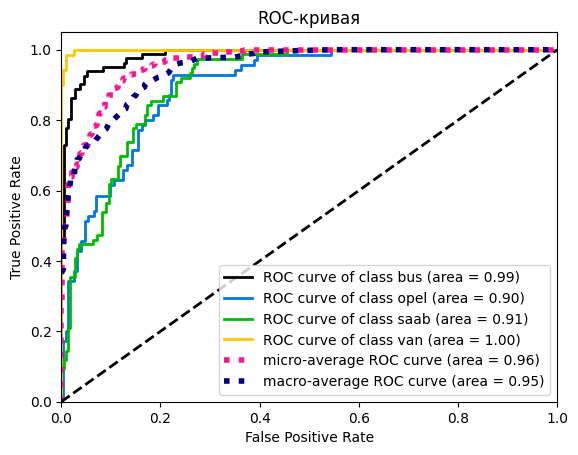

In [100]:
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.title("ROC-кривая")
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [147]:
### YOUR CODE HERE
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
explained_variance = pca.explained_variance_ratio_

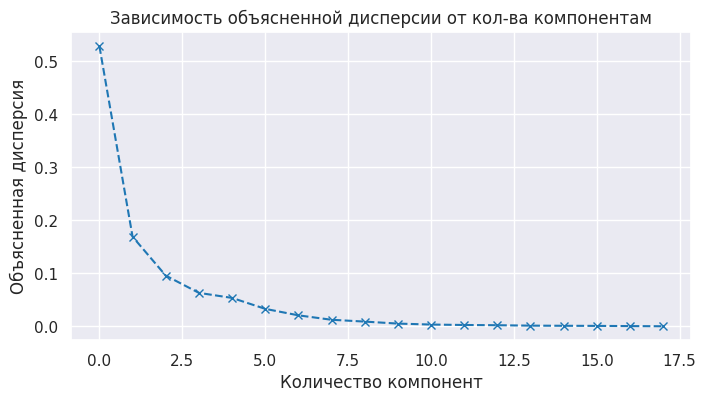

In [148]:
with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
    plt.figure(figsize=(8, 4))
    plt.plot(explained_variance, marker="x", linestyle="--")
    plt.title("Зависимость объясненной дисперсии от кол-ва компонентам")
    plt.xlabel("Количество компонент")
    plt.ylabel("Объясненная дисперсия")
    plt.grid(True)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

По графику в данном случае не так просто выбрать оптимальное число компонент, поэтому переберем все варианты вручную и выберем минимальный, на котором достигается относительно неплохой результат.

In [161]:
### YOUR CODE HERE
fs = []
accs = []
pca = PCA()

for i in range(1, len(explained_variance)):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.fit_transform(X_test_scaled)

    grid_search.fit(X_train_pca, y_train)
    best_params = grid_search.best_params_
    # print("Лучшие параметры:", best_params)
    best_log_reg = grid_search.best_estimator_
    y_pred = best_log_reg.predict(X_test_pca)
    y_pred_proba = best_log_reg.predict_proba(X_test_pca)

    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)
    fs.append(f1)
    accs.append(accuracy)

In [166]:
print(np.round(fs, 2))

[0.25 0.45 0.39 0.45 0.42 0.54 0.57 0.5  0.51 0.49 0.53 0.55 0.56 0.59
 0.58 0.6  0.6 ]


In [167]:
print(np.round(accs, 2))

[0.3  0.45 0.4  0.46 0.43 0.55 0.57 0.5  0.51 0.49 0.53 0.54 0.55 0.58
 0.58 0.59 0.59]


Итак, видно, что оптимально взять, напрмер, семь компонент.

In [169]:
num_comp = 7

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [170]:
### YOUR CODE HERE
pca = PCA(n_components=num_comp)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
# print("Лучшие параметры:", best_params)
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test_pca)
y_pred_proba = best_log_reg.predict_proba(X_test_pca)

f1 = f1_score(y_test, y_pred, average="macro")
accuracy = accuracy_score(y_test, y_pred)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

F1 Score: 0.5694782787138067
Accuracy Score: 0.5777027027027027


#### 2.5. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the model from above with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

Tip: there's a function in sklern to do that

In [172]:
best_params

{'C': 1, 'penalty': 'l2'}

In [186]:
# YOUR CODE HERE
accs = []
fs = []

log_reg = LogisticRegression(
    multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500, C=1, penalty="l2"
)

num_parts = 10
part_size = math.ceil(len(y_train) / num_parts)

for train_size in range(part_size, len(y_train), part_size):
    log_reg.fit(X_train_scaled[:train_size], y_train[:train_size])
    y_predict = log_reg.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict, average="macro")
    accs.append(accuracy)
    fs.append(f1)

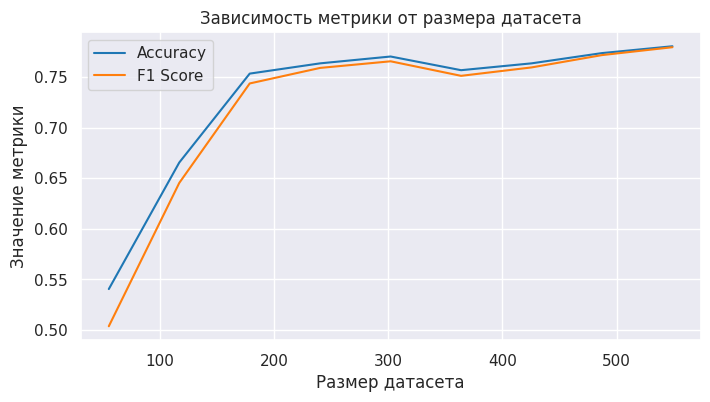

In [192]:
with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
    plt.figure(figsize=(8, 4))
    x = np.linspace(part_size, len(y_train), num_parts - 1)
    plt.plot(x, accs, label="Accuracy")
    plt.plot(x, fs, label="F1 Score")
    plt.title("Зависимость метрики от размера датасета")
    plt.ylabel("Значение метрики")
    plt.xlabel("Размер датасета")
    plt.legend()

График показывает, что с ростом выборки показатели точности предсказания, как и ожидалось, растут.

__Вывод__. Итак, мы обработали датасет, классифицировали виды транспорта с помощью логистической регрессии и получили точность F1 Score = 0.78 = Accuracy. Далее мы применили метод главных компонент к данным и, применив к результату снова логистическую регрессию, получили точность предсказания F1 Score = 0.57 = Accuracy (при этом оптимальное число компонент равно семи). В конце же мы убедились, что с ростом обучающей выборки точность предсказания растет.